# Football Striker Analysis

This project aims to find strikers who are undervalued based on the difference between their goals scored and xG. The idea is that when a striker has outscored his xG by a lot, it is not just luck, but the striker has great finishing and is able to make the most of half-chances and chances. On the other hand, a striker who has underscored his xG by a lot, seems to not have finishing and misses chances consistently. Finishing, while not the only one, is a very important aspect of a striker's skill set and players with good finishing have the ability to change the game with a moment of brilliance while players with poor finishing are likely to miss big chances that come their way that could cost the team in big matches.

We begin by importing player data from the top 5 leagues of Europe for the 2020/2021 season. We then create a new column to find the difference between a strikers goals scored and their xG. We also have a column for the ration of goals scored to xG. This would be important as it normalizes based on the amount of chances the player gets. Lewandowski, playing for Bayern Munich, the Champion's League winners, gets many more chances than Morales who plays for Levante. Morales' finishing ability should not be penalized because of this and so we also want to look at the ratio.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [18]:
players_2021 = pd.read_csv('2020_season_data.csv')

In [110]:
players_2021['goals_season'] = pd.to_numeric(players_2021['goals_season'])
players_2021['xG_season'] = pd.to_numeric(players_2021['xG_season'])
players_2021['goals-xG_season'] = players_2021['goals_season'] - players_2021['xG_season']
players_2021['goals/xG_season'] = players_2021['goals_season']/ players_2021['xG_season']

Let us now look at the players that have overperformed their xG. This allows us to quantify how good a player is at finishing chances and half chances they get. This can be used as a good metric to judge strikers. We also require a minimum condition of 10 goals as players with less than 10 goals could have just gotten lucky a few times. This shows that Robert Lewandowski and Erling Haaland are the best strikers in the world which many would agree on. Many other well known players are in the list but it is interesting to see Luis Muriel, Morales, Domenico Berardi, Youssef En-Nesyri, Silas Wamangituka and other relatively less famous players high in this list. These players could be potentially good signings and will likely provide good value.

In [111]:
best_players = players_2021[players_2021['goals_season'] > 10].sort_values(by=['goals-xG_season'], ascending=False).head(30)
best_players

,Unnamed: 0,id,player_name,games,time,goals_season,xG_season,assists_season,xA_season,shots_season,...,npg_season,npxG_season,xGChain,xGBuildup,goals-xG_season,goals-xG_season/xg_season,goals_season/xg_season,goals-xG_season_per90,goals/xg_season,goals/xG_season
1050,1050,227,Robert Lewandowski,25,2107,35,26.269495,6,3.690719,109,...,29,20.965058,26.035037,4.821937,8.730505,0.332344,1.332344,0.372921,1.332344,1.332344
1052,1052,8260,Erling Haaland,21,1786,21,15.827274,4,2.732953,67,...,20,14.311721,19.515118,4.310749,5.172726,0.326824,1.326824,0.260664,1.326824,1.326824
1521,1521,1229,Luis Muriel,26,977,16,10.967226,6,3.177072,57,...,15,10.205967,17.430436,4.827591,5.032774,0.458892,1.458892,0.463613,1.458892,1.458892
504,504,2098,Luis Suárez,25,1986,19,14.339417,2,2.193322,82,...,16,12.109584,14.158730,1.076401,4.660583,0.325019,1.325019,0.211205,1.325019,1.325019
509,509,2186,Morales,28,1898,11,6.774610,3,3.918650,45,...,11,6.031460,11.016388,2.859091,4.225390,0.623710,1.623710,0.200361,1.623710,1.623710
5,5,453,Son Heung-Min,28,2377,13,8.788973,9,7.839108,51,...,13,8.788973,17.163967,5.310479,4.211027,0.479126,1.479126,0.159441,1.479126,1.479126
1530,1530,1612,Domenico Berardi,22,1833,11,6.876075,4,4.334251,74,...,8,4.592342,12.890841,6.375073,4.123925,0.599750,1.599750,0.202484,1.599750,1.599750
507,507,5169,Youssef En-Nesyri,28,1686,15,11.227138,0,2.617640,56,...,15,11.227138,13.398927,0.676679,3.772862,0.336048,1.336048,0.201398,1.336048,1.336048
1057,1057,8807,Silas Wamangituka,25,1949,11,7.378058,4,4.952733,45,...,8,5.104728,12.174142,2.146938,3.621942,0.490907,1.490907,0.167252,1.490907,1.490907
6,6,314,Ilkay Gündogan,23,1750,12,8.605308,1,3.251618,44,...,11,7.082970,17.015625,8.812635,3.394692,0.394488,1.394488,0.174584,1.394488,1.394488


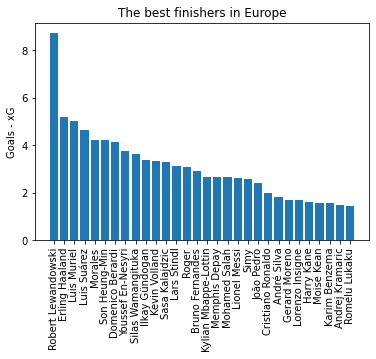

In [122]:
plt.bar(best_players['player_name'], best_players['goals-xG_season'])
plt.xticks(rotation='vertical')
plt.ylabel('Goals - xG')
plt.title('The best finishers in Europe')
plt.show()

I similarly now look at player who underperform compared to their xG. This gives us a list of players who are not able to convert opportunities and would benefit from training on finishing. In this list notable players are Timo Werner, Kevin De Bruyne, Marco Reus, Roberto Firmino, Jamie Vardy, Neymar, and Sadio Mane. Looking purely from a goal scoring point of view, it seems like these players are overvalued by the market. Of course these players (especially the likes of KDB, Neymar, Reus) provide a lot more to the team in terms of creativity as can be seen by their very high xGChain and xGBuildup.

In [113]:
worst_players = players_2021.sort_values(by=['goals-xG_season'], ascending=True).head(30)
worst_players

,Unnamed: 0,id,player_name,games,time,goals_season,xG_season,assists_season,xA_season,shots_season,...,npg_season,npxG_season,xGChain,xGBuildup,goals-xG_season,goals-xG_season/xg_season,goals_season/xg_season,goals-xG_season_per90,goals/xg_season,goals/xG_season
1601,1601,1903,Kevin Lasagna,26,1775,3,10.183935,1,1.819468,57,...,3,10.183935,12.562246,0.828236,-7.183935,-0.705418,0.294582,-0.364256,0.294582,0.294582
42,42,65,Timo Werner,28,2046,5,11.143204,5,3.871920,62,...,5,11.143204,16.077282,4.558672,-6.143204,-0.551296,0.448704,-0.270229,0.448704,0.448704
1701,1701,1518,Rodrigo Palacio,28,1788,1,6.278463,4,3.649396,41,...,1,6.278463,13.120998,5.671751,-5.278463,-0.840725,0.159275,-0.265694,0.159275,0.159275
2115,2115,3781,Denis Bouanga,29,2198,5,10.063746,3,2.373625,74,...,2,7.023366,9.334019,2.616020,-5.063746,-0.503167,0.496833,-0.207342,0.496833,0.496833
43,43,447,Kevin De Bruyne,23,1829,5,9.818335,11,9.454145,77,...,3,7.534828,19.827177,9.956760,-4.818335,-0.490749,0.509251,-0.237097,0.509251,0.509251
1117,1117,319,Marco Reus,24,1663,3,7.537549,6,6.253758,39,...,3,6.194252,14.659363,7.340484,-4.537549,-0.601993,0.398007,-0.245568,0.398007,0.398007
26,26,482,Roberto Firmino,27,2179,6,10.523764,5,3.291990,64,...,6,10.523764,18.626337,7.456929,-4.523764,-0.429862,0.570138,-0.186847,0.570138,0.570138
21,21,531,Michail Antonio,20,1528,7,11.413481,5,2.841429,47,...,7,11.413481,15.793988,2.066910,-4.413481,-0.386690,0.613310,-0.259956,0.613310,0.613310
1544,1544,1253,Edin Dzeko,20,1429,7,11.235418,1,1.656622,51,...,7,11.235418,14.136824,4.724087,-4.235418,-0.376970,0.623030,-0.266751,0.623030,0.623030
2119,2119,5733,Houssem Aouar,24,1568,5,9.205455,3,3.230665,61,...,3,7.685265,16.431190,6.225058,-4.205455,-0.456844,0.543156,-0.241385,0.543156,0.543156


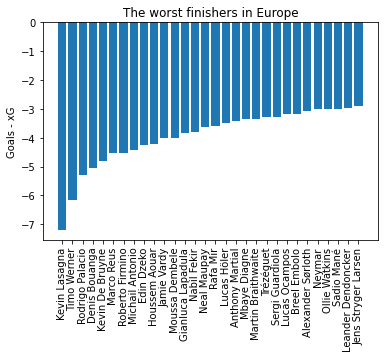

In [123]:
plt.bar(worst_players['player_name'], worst_players['goals-xG_season'])
plt.xticks(rotation='vertical')
plt.ylabel('Goals - xG')
plt.title('The worst finishers in Europe')
plt.show()

We now normalize it to see the results per 90 mins rather than over the whole season. We require a minimum condition of 5 goals (less now because we want to find players who didn't play that much).
We still see a lot of the same names but this aditionally brings forward certain players who may have been injured or haven't gotten to play consistently for some reason or the other. We are more likely to find some undervalued players here. We can see Ibrahima Niane has scored 6 goals in the 480 minutes he has played this season with Metz and outscores his xG by an average of 0.48 per game. Luis Muriel shows similar brilliance and having played 26 games, it is clear that he is an extremely clinical finisher. Some other interesting players to see here are Diogo Jota and Max Kruse who have played very few games but have been extremely good in them. Jota was injured for a large proportion of the season explaining his absence in the Liverpool squad. His quality finishing was severely missed for Liverpool especially considering the alternative is Firmino who shows up high in the list for the strikers with the worst finishing. This was also evident in his comeback to the team against Arsenal when he scored 2 goals.

In [115]:
players_2021['goals-xG_season_per90'] = players_2021['goals-xG_season']/ players_2021['time']*90
best_players_1 = players_2021[players_2021['goals_season'] > 5].sort_values(by=['goals-xG_season_per90'], ascending=False).head(30)
best_players_1

,Unnamed: 0,id,player_name,games,time,goals_season,xG_season,assists_season,xA_season,shots_season,...,npg_season,npxG_season,xGChain,xGBuildup,goals-xG_season,goals-xG_season/xg_season,goals_season/xg_season,goals-xG_season_per90,goals/xg_season,goals/xG_season
2107,2107,5988,Ibrahima Niane,6,479,6,3.449687,0,0.100661,21,...,5,2.689592,3.022363,0.570639,2.550313,0.739288,1.739288,0.479182,1.739288,1.739288
1521,1521,1229,Luis Muriel,26,977,16,10.967226,6,3.177072,57,...,15,10.205967,17.430436,4.827591,5.032774,0.458892,1.458892,0.463613,1.458892,1.458892
38,38,6854,Diogo Jota,12,697,6,2.859045,0,1.508605,23,...,6,2.859045,5.680694,1.908112,3.140955,1.098603,2.098603,0.405575,2.098603,2.098603
1050,1050,227,Robert Lewandowski,25,2107,35,26.269495,6,3.690719,109,...,29,20.965058,26.035037,4.821937,8.730505,0.332344,1.332344,0.372921,1.332344,1.332344
1058,1058,155,Max Kruse,14,1072,10,6.347749,5,3.795744,22,...,5,1.801250,7.455965,3.491427,3.652251,0.575361,1.575361,0.306626,1.575361,1.575361
1548,1548,2116,Felipe Caicedo,21,804,7,4.474181,0,0.637343,28,...,7,4.474181,5.882091,1.267937,2.525819,0.564532,1.564532,0.282741,1.564532,1.564532
20,20,6818,James Maddison,23,1642,8,2.952004,5,3.960227,54,...,8,2.952004,8.305179,4.465912,5.047996,1.710024,2.710024,0.276687,2.710024,2.710024
1537,1537,1580,Mattia Destro,22,1198,9,5.348275,1,0.561634,28,...,9,5.348275,6.474220,0.737177,3.651725,0.682786,1.682786,0.274337,1.682786,1.682786
2093,2093,3314,Franck Honorat,28,1761,8,2.874131,4,6.147879,29,...,8,2.874131,9.739991,3.888876,5.125869,1.783450,2.783450,0.261969,2.783450,2.783450
1052,1052,8260,Erling Haaland,21,1786,21,15.827274,4,2.732953,67,...,20,14.311721,19.515118,4.310749,5.172726,0.326824,1.326824,0.260664,1.326824,1.326824


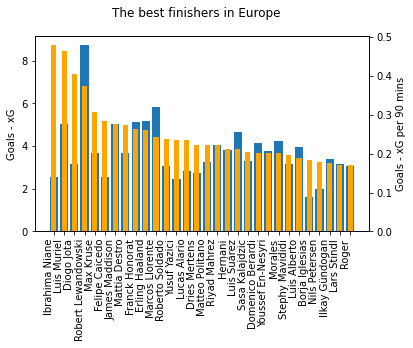

In [127]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

ax.bar(best_players_1['player_name'], best_players_1['goals-xG_season'])
ax2.bar(best_players_1['player_name'], best_players_1['goals-xG_season_per90'], color='orange', width=0.5)
ax.set_ylabel('Goals - xG')
ax2.set_ylabel('Goals - xG per 90 mins')
fig.suptitle('The best finishers in Europe')
fig.autofmt_xdate(rotation='vertical')

In [131]:
worst_players_1 = players_2021[players_2021['xG_season'] > 5].sort_values(by=['goals-xG_season_per90'], ascending=True).head(30)
worst_players_1

,Unnamed: 0,id,player_name,games,time,goals_season,xG_season,assists_season,xA_season,shots_season,...,npg_season,npxG_season,xGChain,xGBuildup,goals-xG_season,goals-xG_season/xg_season,goals_season/xg_season,goals-xG_season_per90,goals/xg_season,goals/xG_season
1601,1601,1903,Kevin Lasagna,26,1775,3,10.183935,1,1.819468,57,...,3,10.183935,12.562246,0.828236,-7.183935,-0.705418,0.294582,-0.364256,0.294582,0.294582
2105,2105,2099,Neymar,12,882,6,9.012917,3,4.070772,45,...,3,6.732632,15.085716,7.359190,-3.012917,-0.334289,0.665711,-0.307441,0.665711,0.665711
613,613,3211,Martin Braithwaite,24,1039,2,5.352209,2,2.511481,20,...,2,4.608932,9.230399,2.961500,-3.352209,-0.626323,0.373677,-0.290374,0.373677,0.373677
42,42,65,Timo Werner,28,2046,5,11.143204,5,3.871920,62,...,5,11.143204,16.077282,4.558672,-6.143204,-0.551296,0.448704,-0.270229,0.448704,0.448704
1544,1544,1253,Edin Dzeko,20,1429,7,11.235418,1,1.656622,51,...,7,11.235418,14.136824,4.724087,-4.235418,-0.376970,0.623030,-0.266751,0.623030,0.623030
1701,1701,1518,Rodrigo Palacio,28,1788,1,6.278463,4,3.649396,41,...,1,6.278463,13.120998,5.671751,-5.278463,-0.840725,0.159275,-0.265694,0.159275,0.159275
21,21,531,Michail Antonio,20,1528,7,11.413481,5,2.841429,47,...,7,11.413481,15.793988,2.066910,-4.413481,-0.386690,0.613310,-0.259956,0.613310,0.613310
1132,1132,6531,Alexander Sørloth,23,1100,3,6.062810,2,1.685713,38,...,3,5.305033,7.727650,2.378762,-3.062810,-0.505180,0.494820,-0.250594,0.494820,0.494820
2151,2151,8653,Adrian Grbic,27,868,4,6.413967,0,0.714056,32,...,1,4.133747,4.867565,0.306189,-2.413967,-0.376361,0.623639,-0.250296,0.623639,0.623639
1117,1117,319,Marco Reus,24,1663,3,7.537549,6,6.253758,39,...,3,6.194252,14.659363,7.340484,-4.537549,-0.601993,0.398007,-0.245568,0.398007,0.398007


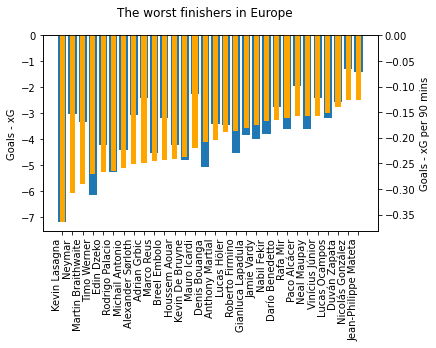

In [132]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

ax.bar(worst_players_1['player_name'], worst_players_1['goals-xG_season'])
ax2.bar(worst_players_1['player_name'], worst_players_1['goals-xG_season_per90'], color='orange', width=0.5)
ax.set_ylabel('Goals - xG')
ax2.set_ylabel('Goals - xG per 90 mins')
fig.suptitle('The worst finishers in Europe')
fig.autofmt_xdate(rotation='vertical')

We now look at the ratio of goals to xG. As we can see this does not make too much of a difference as expected and the players in the lists are very similar. We once again require the condition that the players should have at least scored 10 goals.

In [120]:
best_players_2 = players_2021[players_2021['goals_season'] > 10].sort_values(by=['goals/xG_season'], ascending=False).head(30)
best_players_2

,Unnamed: 0,id,player_name,games,time,goals_season,xG_season,assists_season,xA_season,shots_season,...,npg_season,npxG_season,xGChain,xGBuildup,goals-xG_season,goals-xG_season/xg_season,goals_season/xg_season,goals-xG_season_per90,goals/xg_season,goals/xG_season
509,509,2186,Morales,28,1898,11,6.774610,3,3.918650,45,...,11,6.031460,11.016388,2.859091,4.225390,0.623710,1.623710,0.200361,1.623710,1.623710
1530,1530,1612,Domenico Berardi,22,1833,11,6.876075,4,4.334251,74,...,8,4.592342,12.890841,6.375073,4.123925,0.599750,1.599750,0.202484,1.599750,1.599750
1057,1057,8807,Silas Wamangituka,25,1949,11,7.378058,4,4.952733,45,...,8,5.104728,12.174142,2.146938,3.621942,0.490907,1.490907,0.167252,1.490907,1.490907
5,5,453,Son Heung-Min,28,2377,13,8.788973,9,7.839108,51,...,13,8.788973,17.163967,5.310479,4.211027,0.479126,1.479126,0.159441,1.479126,1.479126
1521,1521,1229,Luis Muriel,26,977,16,10.967226,6,3.177072,57,...,15,10.205967,17.430436,4.827591,5.032774,0.458892,1.458892,0.463613,1.458892,1.458892
1056,1056,208,Lars Stindl,25,1643,11,7.863867,5,3.307450,46,...,6,3.317369,9.161690,3.287063,3.136133,0.398803,1.398803,0.171791,1.398803,1.398803
6,6,314,Ilkay Gündogan,23,1750,12,8.605308,1,3.251618,44,...,11,7.082970,17.015625,8.812635,3.394692,0.394488,1.394488,0.174584,1.394488,1.394488
510,510,2566,Roger,24,1616,11,7.930143,2,1.915053,33,...,9,4.957032,9.856762,3.557487,3.069857,0.387113,1.387113,0.170970,1.387113,1.387113
2078,2078,83,Kevin Volland,28,2202,13,9.681886,7,4.732179,45,...,13,9.681886,15.000377,3.061274,3.318114,0.342714,1.342714,0.135618,1.342714,1.342714
1055,1055,8812,Sasa Kalajdzic,25,1456,13,9.702598,3,2.195840,52,...,13,9.702598,11.486377,1.621786,3.297402,0.339847,1.339847,0.203823,1.339847,1.339847


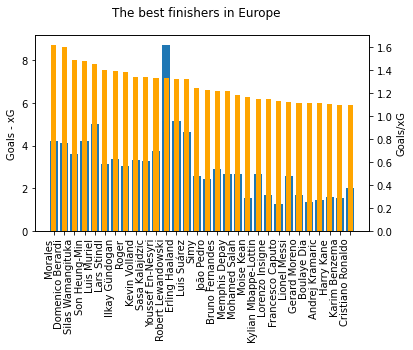

In [128]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

ax.bar(best_players_2['player_name'], best_players_2['goals-xG_season'])
ax2.bar(best_players_2['player_name'], best_players_2['goals/xG_season'], color='orange', width=0.5)
ax.set_ylabel('Goals - xG')
ax2.set_ylabel('Goals/xG')
fig.suptitle('The best finishers in Europe')
fig.autofmt_xdate(rotation='vertical')

This brings us to the end of the short project showing the quality of strikers in the top 5 leagues in Europe in the 2020/2021 season. I was unable to get access to data that also gives the age and current market value of the player. However, given this data, it would not be difficult to extend this analysis to find good young strikers that are currently undervalued.

Another idea I had was to predict whether or not a young player will be 'successful'. We would have to begin by defining 'successful' and just an idea for this definition would be to be on the team of the season for their league for at least 3 years. Then we can have a list of paramters for every player that are accessible such as hieght, weight, speed (time for 100m sprint perhaps?), #goals, #assists, xG, xA, clean sheets, etc. This is now a classifciation problem. We would then train a neural network using data for many players when they were younger (say 18 perhaps) and then use that to predict whether current youngsters will be 'successful'. Other machine learning techniques such as k-nearest neighbours, etc should also be explored to find good accuracy.